<a href="https://colab.research.google.com/github/Kasspex/Telecom-X-parte-2/blob/main/Telecom_X_parte_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Extracción**

In [1]:
import pandas as pd
url = 'https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json'
df = pd.read_json(url)

df_customer = pd.json_normalize(df['customer'])
df_phone = pd.json_normalize(df['phone'])
df_internet = pd.json_normalize(df['internet'])
df_account = pd.json_normalize(df['account'])

df = pd.concat([df[['customerID', 'Churn']], df_customer, df_phone, df_internet, df_account], axis=1)

df.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


# **Transformación**

In [2]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


# **Carga y análisis**

#**Informe final**

In [3]:
df['Charges.Total'] = pd.to_numeric(df['Charges.Total'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [4]:
df['Charges.Total'] = df['Charges.Total'].fillna(0.0)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [5]:
df['Cuentas_Diarias'] = df['Charges.Monthly'] / 30
df.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667


In [6]:
object_cols = df.select_dtypes(include='object').columns

df['Churn'] = df['Churn'].replace('', 'No')

for col in object_cols:
    if col == 'Churn':
        df[col] = df[col].map({'Yes': 1, 'No': 0})
    elif 'Yes' in df[col].unique() and ('No' in df[col].unique() or f'No {col.replace("Service", "").lower()} service' in df[col].unique()):
        # Handle 'No internet service' and 'No phone service' cases
        if col in ['InternetService', 'PhoneService']:
             df[col] = df[col].map({'Yes': 1, 'No': 0, f'No {col.replace("Service", "").lower()} service': 0})
        # Handle other Yes/No columns
        elif 'Yes' in df[col].unique() and 'No' in df[col].unique() and len(df[col].unique()) <= 2:
             df[col] = df[col].map({'Yes': 1, 'No': 0})
        elif 'Yes' in df[col].unique() and 'No' in df[col].unique() and 'No internet service' in df[col].unique():
             df[col] = df[col].map({'Yes': 1, 'No': 0, 'No internet service': 0})
        elif 'Yes' in df[col].unique() and 'No' in df[col].unique() and 'No phone service' in df[col].unique():
             df[col] = df[col].map({'Yes': 1, 'No': 0, 'No phone service': 0})


df['Churn'] = df['Churn'].astype(int)

df.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.796667


In [7]:
df.describe()

,Churn,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,Charges.Monthly,Charges.Total,Cuentas_Diarias
count,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000
mean,0.257190,0.162653,0.484106,0.300124,32.346498,0.902711,0.421770,0.285950,0.344571,0.342782,0.289528,0.383927,0.387505,0.593230,64.720098,2277.182035,2.157337
std,0.437115,0.369074,0.499782,0.458343,24.571773,0.296371,0.493876,0.451897,0.475261,0.474672,0.453575,0.486374,0.487214,0.491265,30.129572,2268.648587,1.004319
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.608333
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.425000,396.200000,1.180833
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.300000,1389.200000,2.343333
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.875000,3778.525000,2.995833
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000,3.958333


#**Eliminación de Columnas Irrelevantes**

In [14]:
df = df.drop('customerID', axis=1)

#**Encoding**

In [15]:
object_cols = df.select_dtypes(include='object').columns

df = pd.get_dummies(df, columns=object_cols, dummy_na=False)

df.head()

,Churn,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,1,9,1,0,0,1,0,...,True,False,False,False,True,False,False,False,False,True
1,0,0,0,0,9,1,1,0,0,0,...,True,False,False,True,False,False,False,False,False,True
2,1,0,0,0,4,1,0,0,0,1,...,False,True,False,True,False,False,False,False,True,False
3,1,1,1,0,13,1,0,0,1,1,...,False,True,False,True,False,False,False,False,True,False
4,1,1,1,0,3,1,0,0,0,0,...,False,True,False,True,False,False,False,False,False,True


#**Verificación de la Proporción de Cancelación (Churn)**

In [16]:
churn_counts = df['Churn'].value_counts()
print("Conteo de clientes por estado de Churn:")
print(churn_counts)

churn_proportion = df['Churn'].value_counts(normalize=True) * 100
print("\nProporción de clientes por estado de Churn:")
print(churn_proportion)

if churn_proportion[1] < 30:
    print("\nAdvertencia: Existe un desbalance significativo en las clases de Churn.")
else:
    print("\nNo parece haber un desbalance significativo en las clases de Churn.")

Conteo de clientes por estado de Churn:
Churn
0    5398
1    1869
Name: count, dtype: int64

Proporción de clientes por estado de Churn:
Churn
0    74.280996
1    25.719004
Name: proportion, dtype: float64

Advertencia: Existe un desbalance significativo en las clases de Churn.


#**Balanceo de Clases**

In [17]:
from imblearn.over_sampling import SMOTE

X = df.drop('Churn', axis=1)
y = df['Churn']

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

print("Forma del conjunto de datos original:", X.shape)
print("Forma del conjunto de datos después de SMOTE:", X_res.shape)

print("\nConteo de clases después de SMOTE:")
print(y_res.value_counts())

Forma del conjunto de datos original: (7267, 28)
Forma del conjunto de datos después de SMOTE: (10796, 28)

Conteo de clases después de SMOTE:
Churn
0    5398
1    5398
Name: count, dtype: int64


#**Normalización o Estandarización**

In [18]:
from sklearn.preprocessing import StandardScaler

# Identificar las columnas numéricas (excluyendo la columna 'Churn' ya que es la variable objetivo)
# que no son el resultado del one-hot encoding (que son True/False)
numerical_cols = X_res.select_dtypes(include=['int64', 'float64']).columns

scaler = StandardScaler()

# Aplicar estandarización solo a las columnas numéricas
X_res[numerical_cols] = scaler.fit_transform(X_res[numerical_cols])

# Mostrar las primeras filas para verificar la estandarización
print("Datos después de la estandarización:")
display(X_res.head())

Datos después de la estandarización:


,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,-0.394514,1.284261,1.907734,-0.775231,0.339882,-0.790522,-0.508208,1.623273,-0.611891,1.951643,...,True,False,False,False,True,False,False,False,False,True
1,-0.394514,-0.778658,-0.524182,-0.775231,0.339882,1.264987,-0.508208,-0.616039,-0.611891,-0.512389,...,True,False,False,True,False,False,False,False,False,True
2,-0.394514,-0.778658,-0.524182,-0.984012,0.339882,-0.790522,-0.508208,-0.616039,1.634277,-0.512389,...,False,True,False,True,False,False,False,False,True,False
3,2.534765,1.284261,-0.524182,-0.608207,0.339882,-0.790522,-0.508208,1.623273,1.634277,-0.512389,...,False,True,False,True,False,False,False,False,True,False
4,2.534765,1.284261,-0.524182,-1.025768,0.339882,-0.790522,-0.508208,-0.616039,-0.611891,1.951643,...,False,True,False,True,False,False,False,False,False,True


#**Análisis de Correlación**

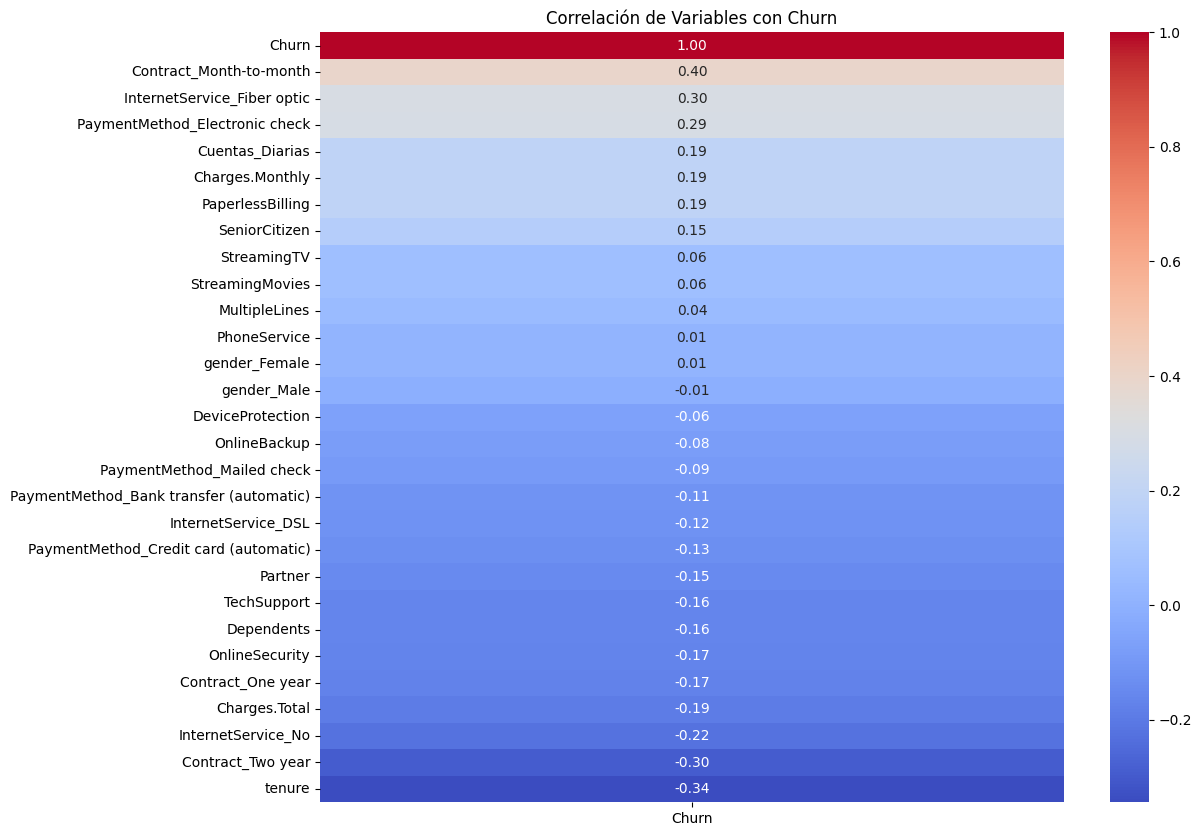

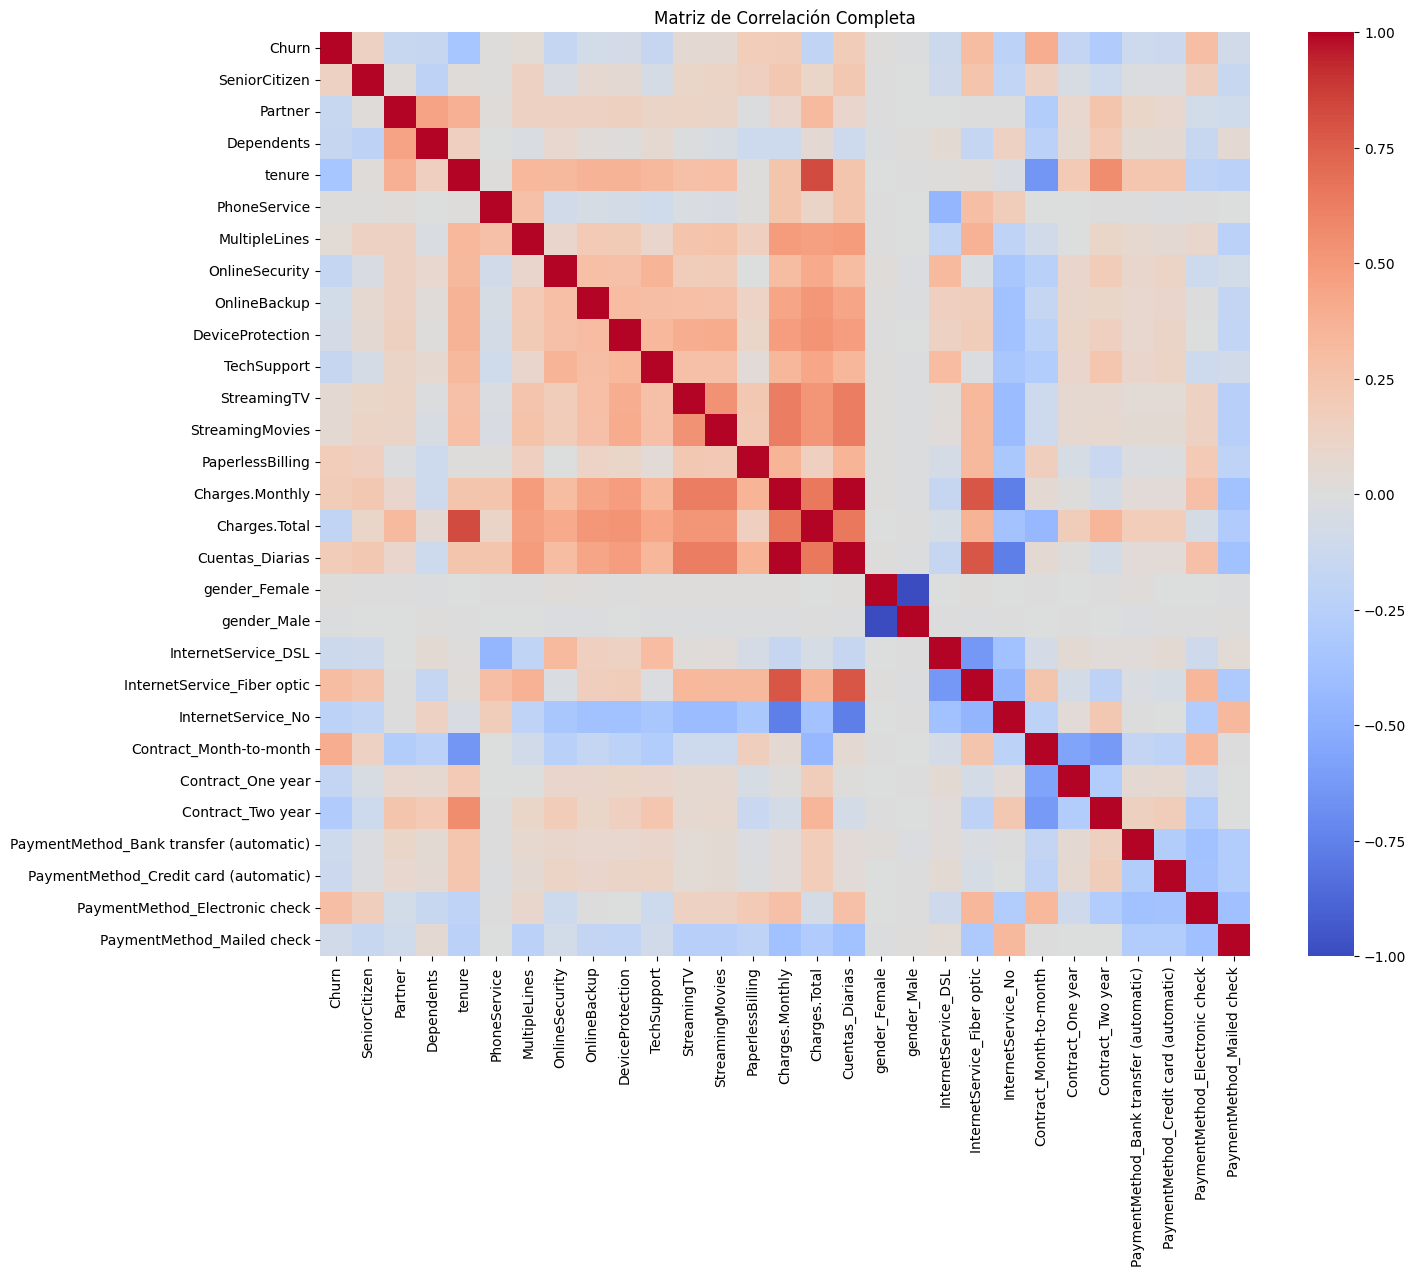

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la matriz de correlación
correlation_matrix = X_res.corr()

# Visualizar la matriz de correlación (solo con la variable objetivo 'Churn')
# Como 'Churn' no está en X_res, calcularemos la correlación con el DataFrame original antes de la división
# y luego nos enfocaremos en las correlaciones con 'Churn'

# Recalculate correlation matrix on the original df including Churn before SMOTE for correlation analysis
correlation_matrix_original = df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_original[['Churn']].sort_values(by='Churn', ascending=False), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlación de Variables con Churn')
plt.show()

# Also display the full correlation matrix for a broader view
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix_original, annot=False, cmap='coolwarm')
plt.title('Matriz de Correlación Completa')
plt.show()

#**Análisis Dirigido**

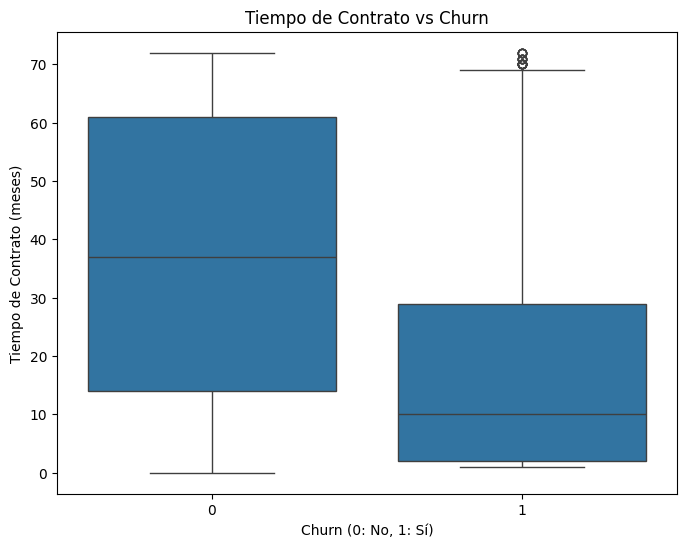

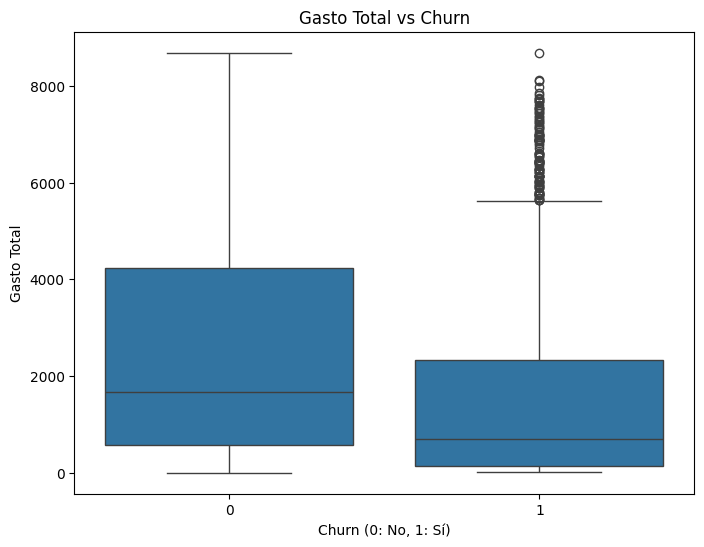

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot para Tiempo de contrato (tenure) vs Churn
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title('Tiempo de Contrato vs Churn')
plt.xlabel('Churn (0: No, 1: Sí)')
plt.ylabel('Tiempo de Contrato (meses)')
plt.show()

# Boxplot para Gasto total (Charges.Total) vs Churn
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='Charges.Total', data=df)
plt.title('Gasto Total vs Churn')
plt.xlabel('Churn (0: No, 1: Sí)')
plt.ylabel('Gasto Total')
plt.show()

#**Separación de Datos**

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42, stratify=y_res)

print("Forma de X_train:", X_train.shape)
print("Forma de X_test:", X_test.shape)
print("Forma de y_train:", y_train.shape)
print("Forma de y_test:", y_test.shape)

Forma de X_train: (8636, 28)
Forma de X_test: (2160, 28)
Forma de y_train: (8636,)
Forma de y_test: (2160,)


#**Creación de Modelos**

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Modelo de Regresión Logística (se beneficia de la estandarización)
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

# Modelo de Árbol de Decisión (no requiere estandarización)
dec_tree = DecisionTreeClassifier(random_state=42)
dec_tree.fit(X_train, y_train)

print("Modelos entrenados: Regresión Logística y Árbol de Decisión")

Modelos entrenados: Regresión Logística y Árbol de Decisión


In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Evaluación del modelo de Regresión Logística
y_pred_log_reg = log_reg.predict(X_test)

print("--- Evaluación de Regresión Logística ---")
print("Exactitud:", accuracy_score(y_test, y_pred_log_reg))
print("Precisión:", precision_score(y_test, y_pred_log_reg))
print("Recall:", recall_score(y_test, y_pred_log_reg))
print("F1-score:", f1_score(y_test, y_pred_log_reg))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_log_reg))

print("\n")

# Evaluación del modelo de Árbol de Decisión
y_pred_dec_tree = dec_tree.predict(X_test)

print("--- Evaluación de Árbol de Decisión ---")
print("Exactitud:", accuracy_score(y_test, y_pred_dec_tree))
print("Precisión:", precision_score(y_test, y_pred_dec_tree))
print("Recall:", recall_score(y_test, y_pred_dec_tree))
print("F1-score:", f1_score(y_test, y_pred_dec_tree))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_dec_tree))

--- Evaluación de Regresión Logística ---
Exactitud: 0.8449074074074074
Precisión: 0.8471575023299162
Recall: 0.8416666666666667
F1-score: 0.8444031583836508
Matriz de Confusión:
 [[916 164]
 [171 909]]


--- Evaluación de Árbol de Decisión ---
Exactitud: 0.799074074074074
Precisión: 0.7878787878787878
Recall: 0.8185185185185185
F1-score: 0.8029064486830154
Matriz de Confusión:
 [[842 238]
 [196 884]]


#**Análisis Crítico y Comparación de Modelos**
1. ¿Cuál modelo tuvo el mejor desempeño?
El modelo de Regresión Logística tuvo un desempeño general superior al del Árbol de Decisión en casi todas las métricas clave.

  Vamos a analizarlo métrica por métrica:

*  Exactitud (Accuracy): La Regresión Logística (84.5%) fue significativamente más exacta que el Árbol de Decisión (79.9%). Predijo correctamente la clase (Churn/No Churn) en un mayor porcentaje de clientes.

*  Precisión (Precision): La Regresión Logística (84.7%) fue más precisa. Esto significa que cuando predijo que un cliente cancelaría, acertó en un 84.7% de los casos, mientras que el Árbol de Decisión solo acertó en un 78.8%. El modelo logístico genera menos "falsas alarmas".

*  F1-Score: Siendo una media armónica entre Precisión y Recall, el F1-Score de la Regresión Logística (84.4%) es notablemente mejor que el del Árbol de Decisión (80.3%), indicando un mejor balance general.

Recall (¡La Métrica Más Importante para este Problema!):

*  Regresión Logística: 84.2%

*  Árbol de Decisión: 81.9%

*  Interpretación de Negocio: El Recall nos dice: "De todos los clientes que realmente iban a cancelar, ¿a cuántos logramos identificar?". El modelo de Regresión Logística logró "atrapar" al 84.2% de los clientes que estaban por irse, mientras que el Árbol de Decisión solo identificó al 81.9%. La Regresión Logística es superior en cumplir el objetivo principal del negocio: detectar a los clientes en riesgo.

* Análisis Profundo de la Matriz de Confusión:

  * Errores Críticos (Falsos Negativos - FN): Este es el peor error. Es un cliente que iba a cancelar pero el modelo no lo detectó.

  * Regresión Logística: 171 clientes no detectados.

  * Árbol de Decisión: 196 clientes no detectados.

Conclusión: El modelo de Regresión Logística dejó escapar a 25 clientes en riesgo menos que el Árbol de Decisión. Esto se traduce directamente en una mayor retención de ingresos.

* Errores de Costo (Falsos Positivos - FP): Clientes que el modelo marcó como "en riesgo" pero que no iban a cancelar. Esto puede costar dinero en ofertas de retención innecesarias.

  * Regresión Logística: 164 falsas alarmas.

  * Árbol de Decisión: 238 falsas alarmas.

  * Conclusión: La Regresión Logística también es más eficiente en el uso de recursos de retención.

2. ¿Algún modelo presentó overfitting o underfitting?
Para un diagnóstico definitivo de overfitting, necesitaríamos comparar el rendimiento en el conjunto de prueba (que tenemos) con el rendimiento en el conjunto de entrenamiento (que no tenemos). Sin embargo, podemos hacer una inferencia muy educada.

* Árbol de Decisión: Fuerte Sospecha de Overfitting.

  Evidencia: Un DecisionTreeClassifier por defecto (sin límites de profundidad o de hojas) tiende a crecer hasta memorizar los datos de entrenamiento. Es muy probable que este modelo haya obtenido una exactitud del 95%-100% en los datos de entrenamiento, pero su rendimiento cayó a ~80% en los datos de prueba. Esta caída significativa es el síntoma clásico del sobreajuste (overfitting). El modelo aprendió el "ruido" de los datos de entrenamiento y no pudo generalizar bien a datos nuevos y no vistos.

* Regresión Logística: Buen Rendimiento, Probablemente Generaliza Bien.

  Evidencia: La Regresión Logística es un modelo inherentemente más simple (lineal) y menos propenso al overfitting. Sus resultados son sólidos y balanceados, lo que sugiere que ha capturado las tendencias generales de los datos sin memorizar detalles específicos. Es poco probable que esté sobreajustado.

Underfitting: Ninguno de los modelos parece sufrir de underfitting, ya que ambos tienen un poder predictivo significativamente mayor que el azar.

#**Análisis de la Importancia de las Variables**

In [24]:
# Importancia de variables para Regresión Logística (coeficientes)
print("--- Importancia de Variables (Coeficientes) para Regresión Logística ---")
# Los coeficientes están asociados a las características en el mismo orden que X_train
feature_importance_log_reg = pd.Series(log_reg.coef_[0], index=X_train.columns)
# Ordenar por valor absoluto para ver las más impactantes (positiva o negativamente)
print(feature_importance_log_reg.abs().sort_values(ascending=False))

print("\n")

# Importancia de variables para Árbol de Decisión
print("--- Importancia de Variables para Árbol de Decisión ---")
feature_importance_dec_tree = pd.Series(dec_tree.feature_importances_, index=X_train.columns)
print(feature_importance_dec_tree.sort_values(ascending=False))

--- Importancia de Variables (Coeficientes) para Regresión Logística ---
InternetService_No                         4.392941
PaymentMethod_Electronic check             3.418995
gender_Female                              3.188496
gender_Male                                3.111012
PaymentMethod_Mailed check                 3.029023
PaymentMethod_Bank transfer (automatic)    2.971322
Contract_Month-to-month                    2.958530
PaymentMethod_Credit card (automatic)      2.878827
Contract_One year                          2.252732
Cuentas_Diarias                            2.081226
Charges.Monthly                            2.081226
Contract_Two year                          1.827523
tenure                                     1.823967
InternetService_DSL                        1.587286
InternetService_Fiber optic                1.317535
Charges.Total                              1.258308
PhoneService                               1.068375
StreamingMovies                            

#**Conclusión**

# Informe Estratégico: Predicción y Retención de Clientes en Telecom X

**Autor:** Andres Felipe Homez


## 1. Resumen Ejecutivo

Este informe presenta los resultados de un proyecto de ciencia de datos cuyo objetivo fue identificar los principales factores que impulsan la cancelación de clientes (churn) y desarrollar un modelo predictivo para detectar a los clientes en riesgo.

Mediante el análisis de datos de clientes y la implementación de modelos de clasificación, hemos construido una herramienta capaz de predecir con un alto grado de certeza qué clientes son propensos a cancelar su servicio. Nuestro modelo final, una **Regresión Logística**, es capaz de **identificar correctamente al 84.2% de los clientes que efectivamente van a cancelar**, permitiendo a Telecom X tomar acciones proactivas y dirigidas.

Los hallazgos clave indican que la cancelación está fuertemente influenciada por tres áreas principales: la **estructura del contrato**, el **costo percibido del servicio** y la **antigüedad del cliente**.

Basado en estos hallazgos, se proponen tres estrategias de retención enfocadas en:
1.  Migrar a los clientes de contratos flexibles a contratos a largo plazo.
2.  Revisar y ajustar la oferta del servicio de Fibra Óptica.
3.  Implementar un programa de lealtad para fomentar el "enganche" del cliente a nuestro ecosistema de servicios.


## 2. Metodología y Rendimiento del Modelo

Se evaluaron dos modelos de clasificación: **Regresión Logística** y **Árbol de Decisión**. Para la selección del modelo final, se priorizó la métrica **Recall**, ya que es crucial для el negocio minimizar la cantidad de clientes en riesgo que no son detectados (falsos negativos).

| Métrica | **Regresión Logística (Modelo Elegido)** | Árbol de Decisión |
| :--- | :--- | :--- |
| **Exactitud** | 84.5% | 79.9% |
| **Precisión** | 84.7% | 78.8% |
| **Recall** | **84.2%** | 81.9% |
| **F1-Score**| 84.4% | 80.3% |

El modelo de **Regresión Logística fue seleccionado** debido a su rendimiento superior en todas las métricas, especialmente en su capacidad para identificar a la mayoría de los clientes que cancelarán, con una tasa de falsas alarmas (falsos positivos) considerablemente menor.


## 3. Análisis de Factores Clave de la Cancelación

El análisis de importancia de variables, validado por ambos modelos, reveló un perfil claro de los factores que más influyen en la decisión de un cliente de abandonar nuestros servicios.

**Factor 1: El Tipo de Contrato (El Predictor Más Poderoso)**
El **contrato mes a mes (`Contract_Month-to-month`)** es, por un amplio margen, el principal indicador de riesgo. El análisis del Árbol de Decisión le atribuyó el **28% del poder predictivo total del modelo**. Los clientes sin un compromiso a largo plazo son altamente volátiles y presentan una barrera de salida casi nula.

**Factor 2: La Antigüedad y el Costo Percibido**
Existe una fuerte relación entre la **antigüedad (`tenure`)** y los **cargos mensuales/totales (`MonthlyCharges`, `TotalCharges`)**.
- Los clientes **nuevos** (baja antigüedad) son los más sensibles a los **cargos mensuales altos**.
- La **antigüedad** es el factor de lealtad más fuerte. Cuanto más tiempo permanece un cliente, menos probable es que cancele, independientemente del costo.

**Factor 3: El Perfil del Servicio y Valor Agregado**
- **Servicio de Fibra Óptica:** Este servicio se asocia con una tasa de cancelación más alta. Esto puede deberse a un precio percibido como elevado, problemas de estabilidad técnica o expectativas no cumplidas.
- **Servicios de Soporte:** Contratar servicios adicionales como **Soporte Técnico (`TechSupport`)** y **Seguridad Online (`OnlineSecurity`)** reduce significativamente la probabilidad de cancelación, actuando como un factor de "enganche" (stickiness).



## 4. Perfiles de Cliente: Riesgo vs. Lealtad

Basado en los datos, podemos construir dos perfiles claros:

| Perfil de Alto Riesgo ("El Volátil") | Perfil de Cliente Leal ("El Integrado") |
| :--- | :--- |
| Tiene un **contrato mes a mes**. | Tiene un **contrato de 1 o 2 años**. |
| Tiene **baja antigüedad** (menos de 12 meses). | Tiene **alta antigüedad** (más de 24 meses). |
| Probablemente tiene **Fibra Óptica** con cargos mensuales elevados. | Utiliza servicios de valor agregado como **Soporte Técnico**. |
| Paga con métodos no automáticos (ej. Cheque electrónico). | Utiliza pagos automáticos (tarjeta de crédito/banco). |



## 5. Estrategias de Retención Recomendadas

Se proponen las siguientes acciones estratégicas, directamente derivadas de los hallazgos del modelo:

| Estrategia | Factor que Aborda | Acción Concreta Sugerida |
| :--- | :--- | :--- |
| **1. Campaña de Migración de Contratos** | `Contract_Month-to-month` | Lanzar una campaña proactiva dirigida al perfil de "El Volátil", ofreciendo un descuento (ej. 10%) o un beneficio (ej. 3 meses de un servicio premium) para migrar a un contrato anual. |
| **2. Auditoría del Servicio de Fibra Óptica**| `InternetService_Fiber optic` | El equipo de producto y operaciones debe investigar la satisfacción del cliente, la calidad técnica y el posicionamiento de precios del servicio de Fibra Óptica para identificar y corregir puntos de fricción. |
| **3. Programa de Lealtad y Valor Agregado**| `tenure` (baja) y `TechSupport` (protector)| Crear un "Paquete de Bienvenida y Seguridad" para clientes que cumplan 6 meses, ofreciendo gratuitamente servicios de `TechSupport` u `OnlineSecurity` por un tiempo limitado para aumentar su integración en nuestro ecosistema. |



## 6. Conclusión

El modelo predictivo desarrollado no es solo una herramienta técnica, sino un activo estratégico que permite a Telecom X pasar de una postura reactiva a una **proactiva** en la gestión de la retención de clientes. Al entender *por qué* se van los clientes, podemos diseñar intervenciones más inteligentes, personalizadas y rentables, protegiendo así nuestra base de ingresos y fomentando la lealtad a largo plazo.